In [7]:
!pip install opencv-python matplotlib




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Chọn phương pháp biến đổi ảnh:
I - Image Inverse
G - Gamma Correction
L - Log Transformation
H - Histogram Equalization
C - Contrast Stretching


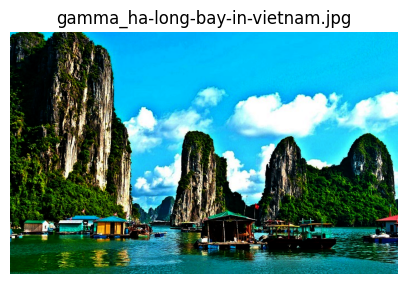

Đã lưu gamma_ha-long-bay-in-vietnam.jpg vào thư mục output


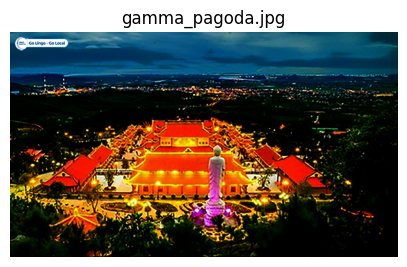

Đã lưu gamma_pagoda.jpg vào thư mục output


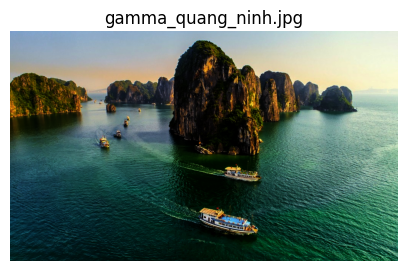

Đã lưu gamma_quang_ninh.jpg vào thư mục output


In [8]:
#Cau1
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Tạo thư mục lưu ảnh kết quả nếu chưa tồn tại
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)

# Hàm hiển thị ảnh
def show_image(title, image):
    plt.figure(figsize=(5,5))
    if len(image.shape) == 2:  # ảnh grayscale
        plt.imshow(image, cmap='gray')
    else:  # ảnh màu
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# 1. Image Inverse
def inverse_image(img):
    return 255 - img

# 2. Gamma Correction
def gamma_correction(img, gamma=2.2):
    img_normalized = img / 255.0
    gamma_corrected = np.power(img_normalized, gamma)
    return np.uint8(gamma_corrected * 255)

# 3. Log Transformation
def log_transform(img):
    img_float = img.astype(np.float32)
    c = 255 / np.log(1 + np.max(img_float))
    log_image = c * np.log(1 + img_float)
    return np.uint8(log_image)

# 4. Histogram Equalization
def histogram_equalization(img):
    if len(img.shape) == 3:  # ảnh màu
        img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
        img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
        return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    else:
        return cv2.equalizeHist(img)

# 5. Contrast Stretching
def contrast_stretching(img):
    a, b = 0, 255
    min_val = np.min(img)
    max_val = np.max(img)
    stretched = (img - min_val) * ((b - a) / (max_val - min_val)) + a
    return np.uint8(stretched)

# Đọc ảnh từ thư mục
def read_images_from_folder(folder_path):
    image_list = []
    file_list = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            path = os.path.join(folder_path, filename)
            img = cv2.imread(path, cv2.IMREAD_COLOR)
            if img is not None:
                image_list.append(img)
                file_list.append(filename)
    return image_list, file_list

# Hàm xử lý chính
def apply_transformation(choice):
    images, filenames = read_images_from_folder('exercise')
    for img, fname in zip(images, filenames):
        if choice == 'I':
            result = inverse_image(img)
            name = 'inverse_' + fname
        elif choice == 'G':
            result = gamma_correction(img)
            name = 'gamma_' + fname
        elif choice == 'L':
            result = log_transform(img)
            name = 'log_' + fname
        elif choice == 'H':
            result = histogram_equalization(img)
            name = 'hist_' + fname
        elif choice == 'C':
            result = contrast_stretching(img)
            name = 'contrast_' + fname
        else:
            print("Phím không hợp lệ!")
            return
        show_image(name, result)
        cv2.imwrite(os.path.join(output_dir, name), result)
        print(f"Đã lưu {name} vào thư mục output")

# Menu
print("Chọn phương pháp biến đổi ảnh:")
print("I - Image Inverse")
print("G - Gamma Correction")
print("L - Log Transformation")
print("H - Histogram Equalization")
print("C - Contrast Stretching")

# Nhập từ người dùng
user_input = input("Nhập phím (I/G/L/H/C): ").upper()
apply_transformation(user_input)


Chọn phương pháp biến đổi ảnh:
F - Fast Fourier Transform
L - Butterworth Lowpass Filter
H - Butterworth Highpass Filter


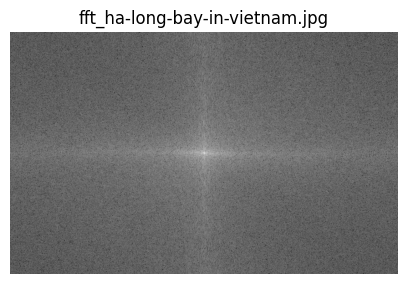

Đã lưu fft_ha-long-bay-in-vietnam.jpg vào thư mục output


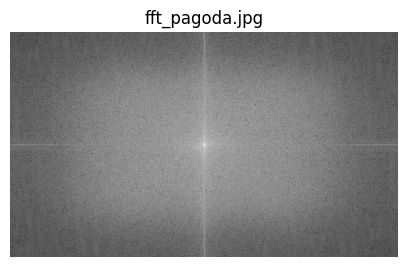

Đã lưu fft_pagoda.jpg vào thư mục output


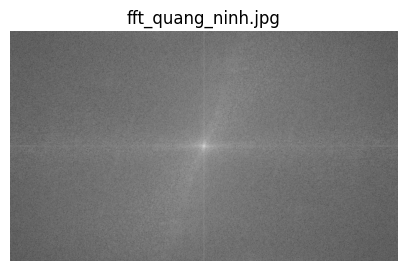

Đã lưu fft_quang_ninh.jpg vào thư mục output


In [9]:
# Cau 2
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Tạo thư mục lưu ảnh kết quả
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)

# Hàm hiển thị ảnh
def show_image(title, image):
    plt.figure(figsize=(5,5))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Fast Fourier Transform
def fast_fourier_transform(img_gray):
    f = np.fft.fft2(img_gray)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
    magnitude_spectrum = np.uint8(cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX))
    return magnitude_spectrum

# Butterworth Lowpass Filter
def butterworth_lowpass(img_gray, D0=30, n=2):
    rows, cols = img_gray.shape
    crow, ccol = rows // 2, cols // 2

    # FFT
    f = np.fft.fft2(img_gray)
    fshift = np.fft.fftshift(f)

    # Create Butterworth lowpass filter
    u = np.arange(rows)
    v = np.arange(cols)
    u, v = np.meshgrid(u - crow, v - ccol, indexing='ij')
    D = np.sqrt(u**2 + v**2)
    H = 1 / (1 + (D / D0)**(2 * n))

    # Apply filter
    G = fshift * H
    f_ishift = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return np.uint8(cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX))

# Butterworth Highpass Filter
def butterworth_highpass(img_gray, D0=30, n=2):
    rows, cols = img_gray.shape
    crow, ccol = rows // 2, cols // 2

    # FFT
    f = np.fft.fft2(img_gray)
    fshift = np.fft.fftshift(f)

    # Create Butterworth highpass filter
    u = np.arange(rows)
    v = np.arange(cols)
    u, v = np.meshgrid(u - crow, v - ccol, indexing='ij')
    D = np.sqrt(u**2 + v**2)
    H = 1 / (1 + (D0 / (D + 1e-5))**(2 * n))  # tránh chia cho 0

    # Apply filter
    G = fshift * H
    f_ishift = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return np.uint8(cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX))

# Đọc ảnh từ thư mục
def read_images_from_folder(folder_path):
    image_list = []
    file_list = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            path = os.path.join(folder_path, filename)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                image_list.append(img)
                file_list.append(filename)
    return image_list, file_list

# Hàm xử lý chính
def apply_transformation(choice):
    images, filenames = read_images_from_folder('exercise')
    for img, fname in zip(images, filenames):
        if choice == 'F':
            result = fast_fourier_transform(img)
            name = 'fft_' + fname
        elif choice == 'L':
            result = butterworth_lowpass(img)
            name = 'lowpass_' + fname
        elif choice == 'H':
            result = butterworth_highpass(img)
            name = 'highpass_' + fname
        else:
            print("Phím không hợp lệ!")
            return
        show_image(name, result)
        cv2.imwrite(os.path.join(output_dir, name), result)
        print(f"Đã lưu {name} vào thư mục output")

# Menu
print("Chọn phương pháp biến đổi ảnh:")
print("F - Fast Fourier Transform")
print("L - Butterworth Lowpass Filter")
print("H - Butterworth Highpass Filter")

# Nhập từ người dùng
user_input = input("Nhập phím (F/L/H): ").upper()
apply_transformation(user_input)



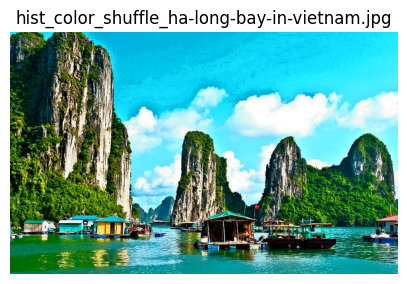

Đã lưu: hist_color_shuffle_ha-long-bay-in-vietnam.jpg


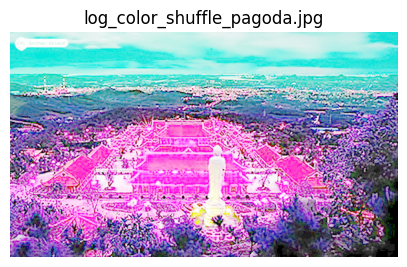

Đã lưu: log_color_shuffle_pagoda.jpg


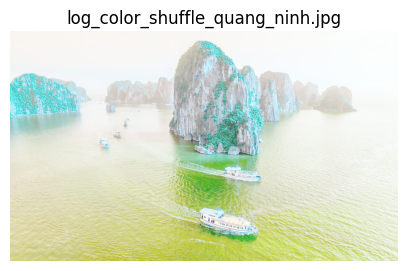

Đã lưu: log_color_shuffle_quang_ninh.jpg


In [10]:
#Cau 3
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Tạo thư mục output nếu chưa có
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)

# Hiển thị ảnh
def show_image(title, image):
    plt.figure(figsize=(5,5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Các phép biến đổi từ câu 1

def inverse_image(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    img_normalized = img / 255.0
    gamma_corrected = np.power(img_normalized, gamma)
    return np.uint8(gamma_corrected * 255)

def log_transform(img):
    img_float = img.astype(np.float32)
    c = 255 / np.log(1 + np.max(img_float))
    log_image = c * np.log(1 + img_float)
    return np.uint8(np.clip(log_image, 0, 255))

def histogram_equalization(img):
    if len(img.shape) == 3:
        img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
        img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
        return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    else:
        return cv2.equalizeHist(img)

def contrast_stretching(img):
    min_val = np.min(img)
    max_val = np.max(img)
    stretched = (img - min_val) * (255 / (max_val - min_val))
    return np.uint8(np.clip(stretched, 0, 255))

# Danh sách các hàm và tên tương ứng
transformations = [
    ('inverse', inverse_image),
    ('gamma', gamma_correction),
    ('log', log_transform),
    ('hist', histogram_equalization),
    ('contrast', contrast_stretching)
]

# Tạo danh sách các hoán vị màu
color_orders = [
    (0, 1, 2),  # BGR
    (0, 2, 1),  # BRG
    (1, 0, 2),  # GBR
    (1, 2, 0),  # GRB
    (2, 0, 1),  # RBG
    (2, 1, 0),  # RGB
]

# Đọc ảnh từ thư mục
def read_images_from_folder(folder_path):
    image_list = []
    file_list = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            path = os.path.join(folder_path, filename)
            img = cv2.imread(path)
            if img is not None:
                image_list.append(img)
                file_list.append(filename)
    return image_list, file_list

# Thực thi
def apply_random_transform_and_shuffle_color():
    images, filenames = read_images_from_folder('exercise')
    
    for img, fname in zip(images, filenames):
        # Đổi thứ tự màu ngẫu nhiên
        color_order = random.choice(color_orders)
        img_shuffled = img[:, :, list(color_order)]
        
        # Chọn phép biến đổi ngẫu nhiên
        transform_name, transform_func = random.choice(transformations)
        img_transformed = transform_func(img_shuffled)

        # Tên file kết quả
        new_name = f"{transform_name}_color_shuffle_{fname}"
        
        # Hiển thị và lưu
        show_image(new_name, img_transformed)
        cv2.imwrite(os.path.join(output_dir, new_name), img_transformed)
        print(f"Đã lưu: {new_name}")

# Chạy chương trình
apply_random_transform_and_shuffle_color()



In [11]:
!pip install opencv-python matplotlib numpy scipy



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


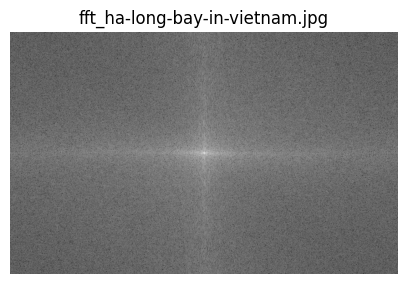

Đã lưu: fft_ha-long-bay-in-vietnam.jpg


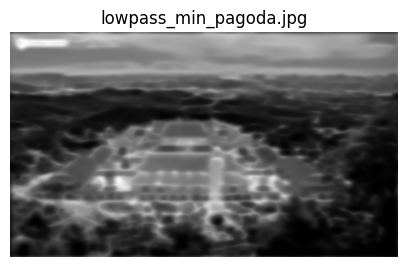

Đã lưu: lowpass_min_pagoda.jpg


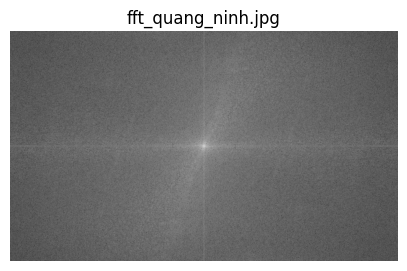

Đã lưu: fft_quang_ninh.jpg


In [13]:
#Cau4
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from scipy.ndimage import minimum_filter, maximum_filter

# Tạo thư mục output nếu chưa có
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)

# Hàm hiển thị ảnh
def show_image(title, image):
    plt.figure(figsize=(5,5))
    if len(image.shape) == 2:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Fast Fourier Transform
def fast_fourier_transform(img_gray):
    f = np.fft.fft2(img_gray)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
    magnitude_spectrum = np.uint8(cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX))
    return magnitude_spectrum

# Butterworth Lowpass Filter
def butterworth_lowpass(img_gray, D0=30, n=2):
    rows, cols = img_gray.shape
    crow, ccol = rows // 2, cols // 2
    f = np.fft.fft2(img_gray)
    fshift = np.fft.fftshift(f)
    u = np.arange(rows)
    v = np.arange(cols)
    u, v = np.meshgrid(u - crow, v - ccol, indexing='ij')
    D = np.sqrt(u**2 + v**2)
    H = 1 / (1 + (D / D0)**(2 * n))
    G = fshift * H
    f_ishift = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return np.uint8(cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX))

# Butterworth Highpass Filter
def butterworth_highpass(img_gray, D0=30, n=2):
    rows, cols = img_gray.shape
    crow, ccol = rows // 2, cols // 2
    f = np.fft.fft2(img_gray)
    fshift = np.fft.fftshift(f)
    u = np.arange(rows)
    v = np.arange(cols)
    u, v = np.meshgrid(u - crow, v - ccol, indexing='ij')
    D = np.sqrt(u**2 + v**2)
    H = 1 / (1 + (D0 / (D + 1e-5))**(2 * n))  # tránh chia cho 0
    G = fshift * H
    f_ishift = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return np.uint8(cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX))

# Min và Max Filter
def apply_min_filter(img, size=3):
    return minimum_filter(img, size=size)

def apply_max_filter(img, size=3):
    return maximum_filter(img, size=size)

# Danh sách hoán vị màu
color_orders = [
    (0, 1, 2),  # BGR
    (0, 2, 1),  # BRG
    (1, 0, 2),  # GBR
    (1, 2, 0),  # GRB
    (2, 0, 1),  # RBG
    (2, 1, 0),  # RGB
]

# Đọc ảnh từ thư mục
def read_images_from_folder(folder_path):
    image_list = []
    file_list = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            path = os.path.join(folder_path, filename)
            img = cv2.imread(path)
            if img is not None:
                image_list.append(img)
                file_list.append(filename)
    return image_list, file_list

# Áp dụng biến đổi ngẫu nhiên
def apply_random_frequency_transform():
    images, filenames = read_images_from_folder('exercise')

    for img, fname in zip(images, filenames):
        # Đổi thứ tự màu ngẫu nhiên
        color_order = random.choice(color_orders)
        img_shuffled = img[:, :, list(color_order)]

        # Chuyển sang ảnh xám
        gray = cv2.cvtColor(img_shuffled, cv2.COLOR_BGR2GRAY)

        # Chọn ngẫu nhiên 1 trong 3 phép biến đổi
        method = random.choice(['fft', 'lowpass', 'highpass'])

        if method == 'fft':
            result = fast_fourier_transform(gray)
            name = 'fft_' + fname
        elif method == 'lowpass':
            lowpassed = butterworth_lowpass(gray)
            result = apply_min_filter(lowpassed)
            name = 'lowpass_min_' + fname
        elif method == 'highpass':
            highpassed = butterworth_highpass(gray)
            result = apply_max_filter(highpassed)
            name = 'highpass_max_' + fname

        # Hiển thị và lưu
        show_image(name, result)
        cv2.imwrite(os.path.join(output_dir, name), result)
        print(f"Đã lưu: {name}")

# Chạy chương trình
apply_random_frequency_transform()
